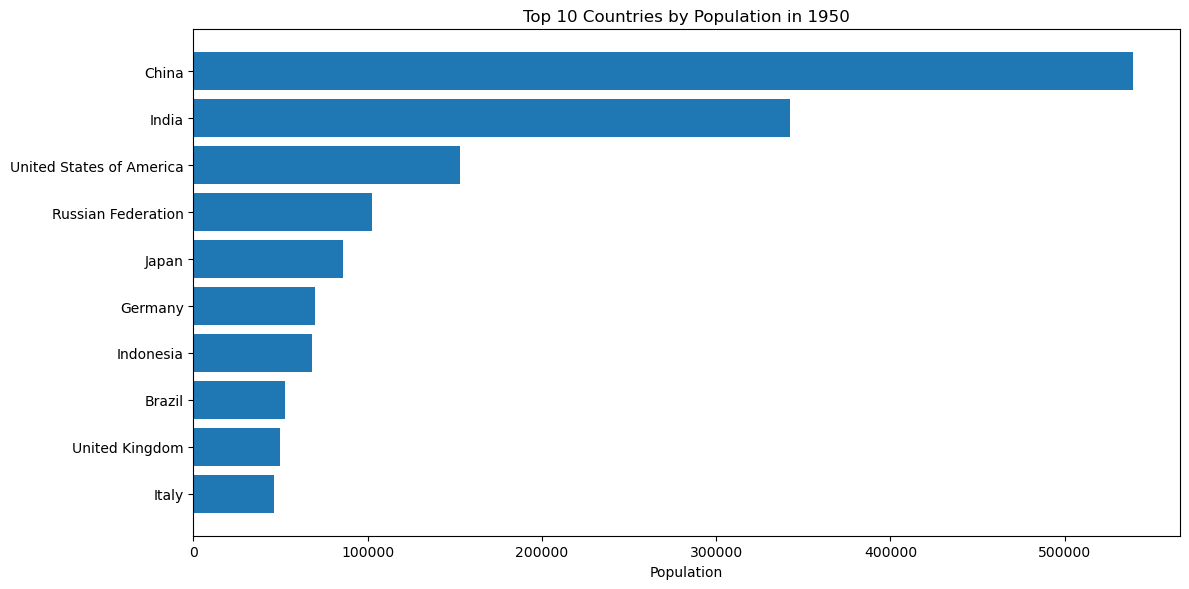

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
    
pop_data=pd.read_csv('C:/Users/Sohini/Desktop/Data Analysis Study/Time_Series_Animation/cleaned_data.csv')
frames=pop_data['Time'].unique()

fig,ax=plt.subplots(figsize=(12,6))
def animate(frame):
    ax.clear()

    pop_data_frame=pop_data[pop_data['Time']==frame]
    top_countries=pop_data_frame.nlargest(10,'TPopulation1Jan').sort_values('TPopulation1Jan', ascending=True)
    ax.barh(top_countries['Location'],top_countries['TPopulation1Jan'])
    ax.set_title(f"Top 10 Countries by Population in {frame}")
    ax.set_xlabel("Population")
    plt.tight_layout()

anime=animation.FuncAnimation(fig,animate,frames=frames,interval=200)
from IPython.display import HTML
HTML(anime.to_jshtml())

from matplotlib.animation import PillowWriter
gif_writer = PillowWriter(fps=5)
anime.save("population_race.gif", writer=gif_writer, dpi=100)
